# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 640


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# lat={lat}&lon={lon}&appid={weather_api_key}
temp_measuring_unit = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key +"&units="+ temp_measuring_unit +"&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json['coord']['lon']
        city_lng = weather_json['coord']['lat']
        city_max_temp = weather_json['main']['temp_max']
        city_humidity = weather_json['main']['humidity']
        city_clouds = weather_json['clouds']['all']
        city_wind = weather_json['wind']['speed']
        city_country = weather_json['sys']['country']
        city_date = datetime.datetime.fromtimestamp(weather_json['dt'])

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 6 of Set 1 | serowe
Processing Record 7 of Set 1 | kumhari
Processing Record 8 of Set 1 | mar del plata
Processing Record 9 of Set 1 | warrnambool
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | ostrovnoy
Processing Record 12 of Set 1 | pergamino
Processing Record 13 of Set 1 | san pedro de macoris
Processing Record 14 of Set 1 | klaksvik
Processing Record 15 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | lata
Processing Record 18 of Set 1 | iquique
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | namwala
Processing Record 21 of Set 1 | martil
Processi

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [10]:
# Display sample data
city_data_df.rename(columns={'Lat':'Long', 'Lng':'Lat'}, inplace=True)
city_data_df.head()

,City,Long,Lat,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vaini,-175.2000,-21.2000,31.09,84,75,5.14,TO,2023-01-21 14:09:00
1,rikitea,-134.9692,-23.1203,26.11,72,71,4.06,PF,2023-01-21 14:09:01
2,port alfred,26.8910,-33.5906,21.77,97,6,3.20,ZA,2023-01-21 14:09:01
3,busselton,115.3333,-33.6500,29.23,37,0,3.42,AU,2023-01-21 14:09:02
4,serowe,26.7167,-22.3833,18.35,66,46,2.19,BW,2023-01-21 14:09:03


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Long,Lat,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vaini,-175.2000,-21.2000,31.09,84,75,5.14,TO,2023-01-21 14:09:00
1,rikitea,-134.9692,-23.1203,26.11,72,71,4.06,PF,2023-01-21 14:09:01
2,port alfred,26.8910,-33.5906,21.77,97,6,3.20,ZA,2023-01-21 14:09:01
3,busselton,115.3333,-33.6500,29.23,37,0,3.42,AU,2023-01-21 14:09:02
4,serowe,26.7167,-22.3833,18.35,66,46,2.19,BW,2023-01-21 14:09:03


In [62]:
city_data_df['Lat'][0]

-21.2

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

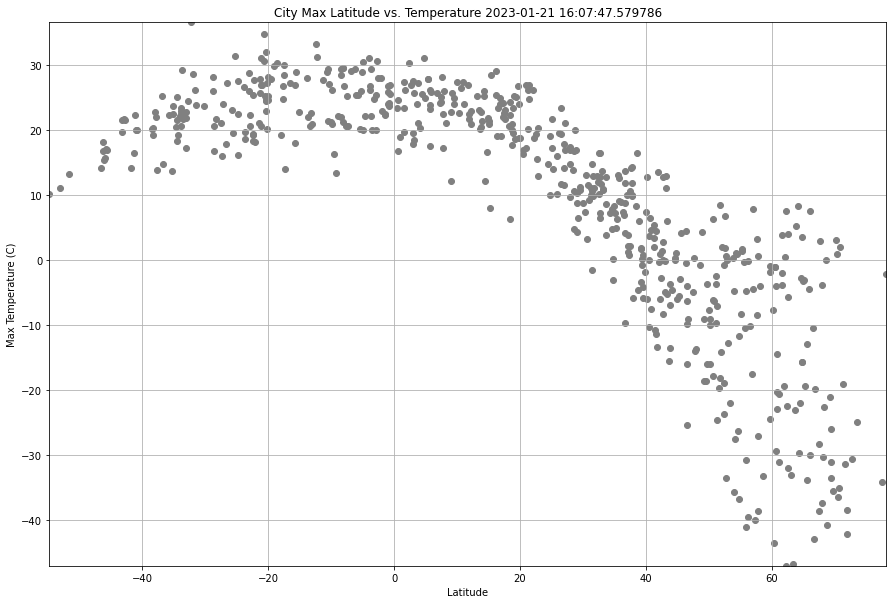

In [96]:
# Build scatter plot for latitude vs. temperature
date = datetime.datetime.now()

x_axis = city_data_df['Lat']

y_axis_temp = city_data_df['Max Temp']

y_label_temp = "Max Temperature (C)"

fig1, ax1 = plt.subplots(figsize=(15,10))

plt.ylim(min(y_axis_temp), max(y_axis_temp))
plt.xlim(min(x_axis), max(x_axis))

plt.scatter(x_axis, y_axis_temp, facecolors="grey", linewidth = 1)

plt.title(f"City Max Latitude vs. Temperature {date}")
plt.xlabel("Latitude")
plt.ylabel(y_label_temp)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

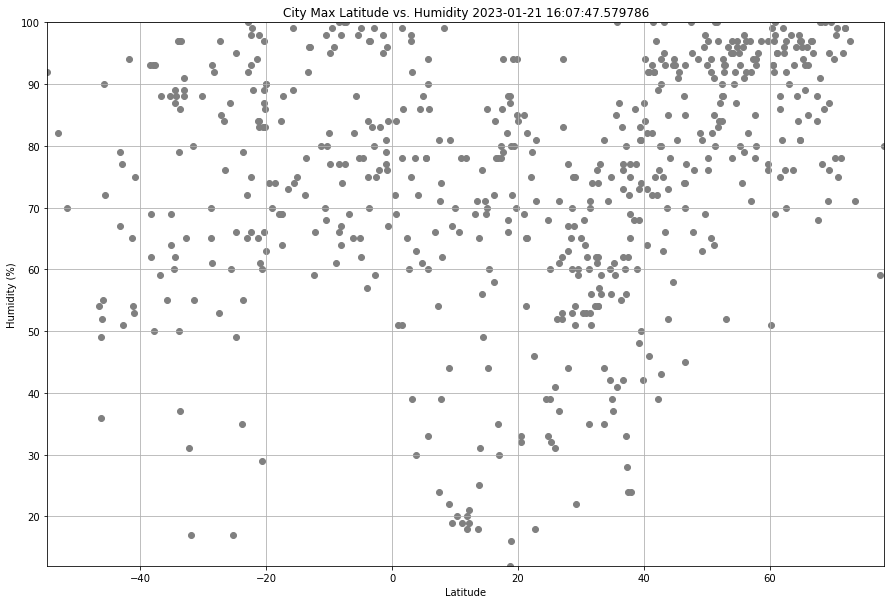

In [97]:
# Build the scatter plots for latitude vs. humidity

x_axis = city_data_df['Lat']

y_axis_humidity = city_data_df['Humidity']

y_label_humidity = "Humidity (%)"

fig1, ax1 = plt.subplots(figsize=(15,10))

plt.ylim(min(y_axis_humidity), max(y_axis_humidity))
plt.xlim(min(x_axis), max(x_axis))

plt.scatter(x_axis, y_axis_humidity, facecolors="grey", linewidth = 1)

plt.title(f"City Max Latitude vs. Humidity {date}")
plt.xlabel("Latitude")
plt.ylabel(y_label_humidity)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

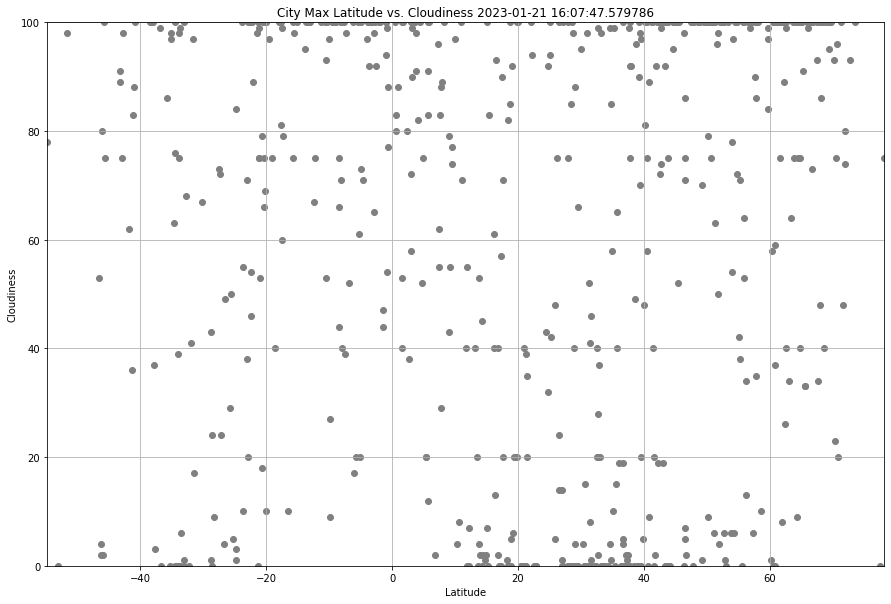

In [98]:
# Build the scatter plots for latitude vs. cloudiness
# Cloudiness

x_axis = city_data_df['Lat']

y_axis_cloudiness = city_data_df['Cloudiness']

y_label_cloudiness = "Cloudiness"

fig1, ax1 = plt.subplots(figsize=(15,10))

plt.ylim(min(y_axis_cloudiness), max(y_axis_cloudiness))
plt.xlim(min(x_axis), max(x_axis))

plt.scatter(x_axis, y_axis_cloudiness, facecolors="grey", linewidth = 1)

plt.title(f"City Max Latitude vs. Cloudiness {date}")
plt.xlabel("Latitude")
plt.ylabel(y_label_cloudiness)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")


# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

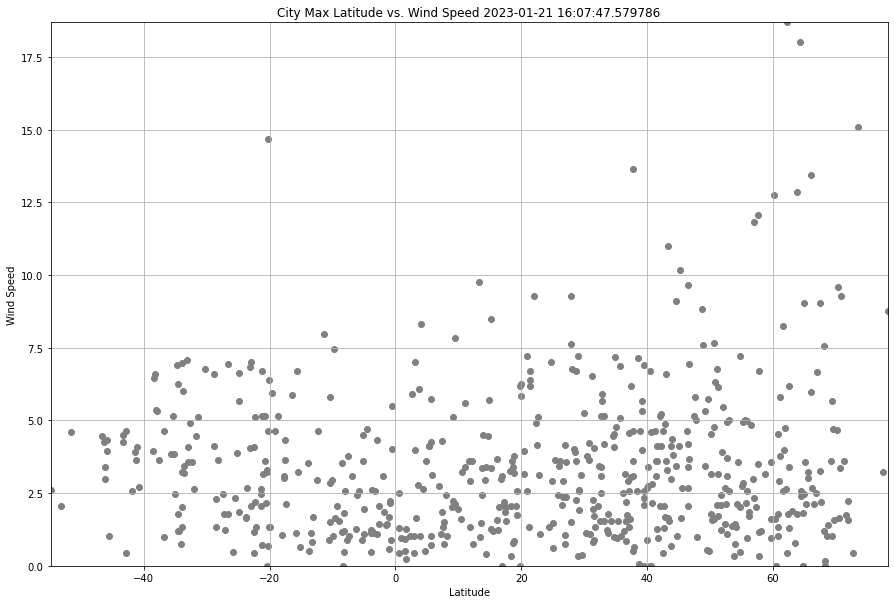

In [99]:
# Build the scatter plots for latitude vs. wind speed
#Wind Speed	


x_axis = city_data_df['Lat']

y_axis_wind = city_data_df['Wind Speed']


fig1, ax1 = plt.subplots(figsize=(15,10))

y_label_wind = "Wind Speed"
plt.ylim(min(y_axis_wind), max(y_axis_wind))
plt.xlim(min(x_axis), max(x_axis))

plt.scatter(x_axis, y_axis_wind, facecolors="grey", linewidth = 1)

plt.title(f"City Max Latitude vs. Wind Speed {date}")
plt.xlabel("Latitude")
plt.ylabel(y_label_wind)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [120]:
# Define a function to create Linear Regression plots
def reg_line(x_values, y_values, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.mean(),y_values.mean()+5),fontsize=20,color="black")
    plt.xlabel('Latittude')
    plt.ylabel(y_label)
    # plt.title(f"{} vs. {} {date}")
    print(f"The r-squared is: {rvalue**2}")
    plt.show()


In [117]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Long,Lat,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,kumhari,81.5167,21.2667,20.19,54,39,1.33,IN,2023-01-21 14:09:04
9,ostrovnoy,39.5131,68.0531,-3.84,91,48,7.57,RU,2023-01-21 14:09:07
11,san pedro de macoris,-69.2972,18.4616,22.34,88,0,3.62,DO,2023-01-21 14:09:08
12,klaksvik,-6.5890,62.2266,7.51,95,100,18.69,FO,2023-01-21 14:09:09
13,barrow,-156.7887,71.2906,-18.99,78,100,3.60,US,2023-01-21 14:09:10


In [118]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <= 0]

lat_north = northern_hemi_df['Lat']
lat_south = southern_hemi_df['Lat']

# Display sample data
southern_hemi_df.head()

,City,Long,Lat,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vaini,-175.2000,-21.2000,31.09,84,75,5.14,TO,2023-01-21 14:09:00
1,rikitea,-134.9692,-23.1203,26.11,72,71,4.06,PF,2023-01-21 14:09:01
2,port alfred,26.8910,-33.5906,21.77,97,6,3.20,ZA,2023-01-21 14:09:01
3,busselton,115.3333,-33.6500,29.23,37,0,3.42,AU,2023-01-21 14:09:02
4,serowe,26.7167,-22.3833,18.35,66,46,2.19,BW,2023-01-21 14:09:03


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7040230823802657


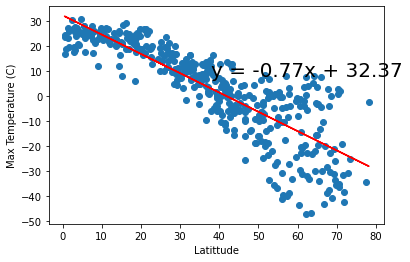

In [121]:
# Linear regression on Northern Hemisphere
north_temp = northern_hemi_df['Max Temp']



reg_line(lat_north, north_temp, y_label_temp)

The r-squared is: 0.22336355857584297


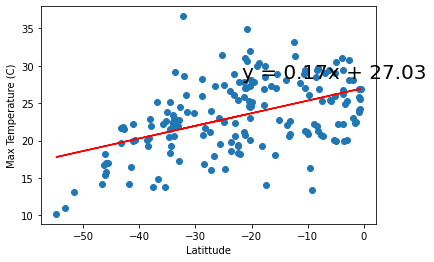

In [104]:
# Linear regression on Southern Hemisphere
south_temp = southern_hemi_df['Max Temp']

reg_line(lat_south, south_temp, y_label_temp)

**Discussion about the linear relationship:** The above plotted charts clearly shows us that the temperature is at its maximum around equator. As we move away from equator towards both north pole and south pole, the temperature starts to decrease. The correlation coefficient between lattitude and temperature in Northern hemisphere is much higher than the Southern hemisphere. The temperature decreases quickly with increasing Lattitude. In the southern hemisphere, the pattern is still visible but not as correlated as in northern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.23578973932495478


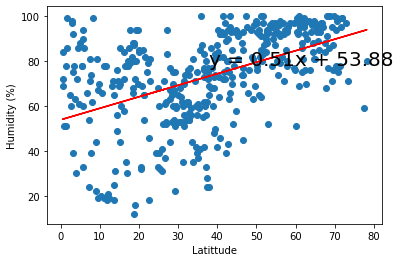

In [105]:
# Northern Hemisphere
north_humidity = northern_hemi_df['Humidity']

reg_line(lat_north, north_humidity, y_label_humidity)

The r-squared is: 0.0562891798876647


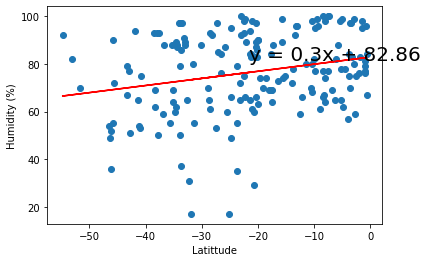

In [106]:
# Southern Hemisphere
south_humidity = southern_hemi_df['Humidity']

reg_line(lat_south, south_humidity, y_label_humidity)

**Discussion about the linear relationship:** The pattern of north vs south poles is sort of opposite in the above charts. The r-squared value is very low in the southern hemisphere chart. The humidity points are more scattered if we move away from equator towards the south pole. But if we move towards the north pole from equator the humidity points start to form cluster around 90% mark. So we can claim that the humidity increases when we move away from equator towards north pole.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.05152433602550248


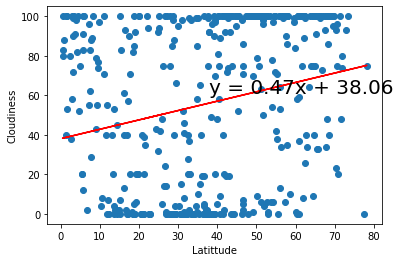

In [107]:
# Northern Hemisphere
north_cloud = northern_hemi_df['Cloudiness']

reg_line(lat_north, north_cloud, y_label_cloudiness)

The r-squared is: 0.07970152056369528


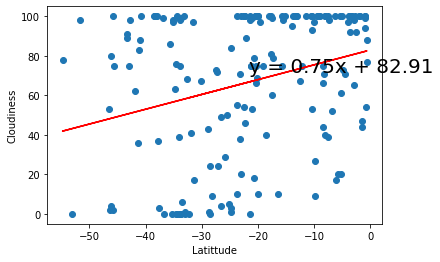

In [108]:
# Southern Hemisphere
south_cloud = southern_hemi_df['Cloudiness']

reg_line(lat_south, south_cloud, y_label_cloudiness)

**Discussion about the linear relationship:** The r-squared value is very low and the points are very scattered. There is no positive correlation visible between cloudiness and lattitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.021572945558193474


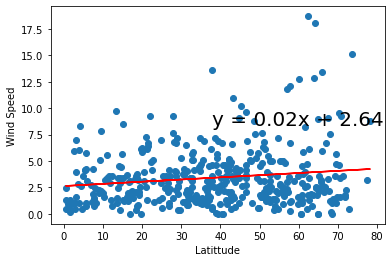

In [109]:
# Northern Hemisphere

north_wind = northern_hemi_df['Wind Speed']

reg_line(lat_north, north_wind, y_label_wind)

The r-squared is: 0.07045832026679427


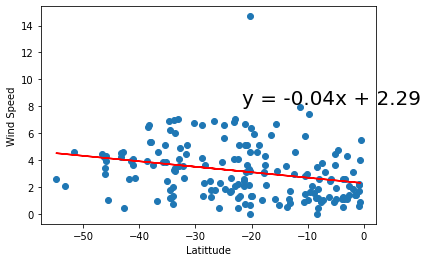

In [110]:
# Southern Hemisphere
south_wind = southern_hemi_df['Wind Speed']

reg_line(lat_south, south_wind, y_label_wind)

**Discussion about the linear relationship:** Wind speed is generally similar throughout the sample of cities we have.